In [629]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk

In [630]:
import io
%cd "/Users/rajeshprabhakarkaila/Downloads/Medicare Physician & Other Practitioners - by Geography and Service/2022"

/Users/rajeshprabhakarkaila/Downloads/Medicare Physician & Other Practitioners - by Geography and Service/2022


In [631]:
medicaredf=pd.read_csv("MUP_PHY_R24_P05_V10_D22_Geo.csv",low_memory=False)

In [632]:
medicaredf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270673 entries, 0 to 270672
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Rndrng_Prvdr_Geo_Lvl   270673 non-null  object 
 1   Rndrng_Prvdr_Geo_Cd    257348 non-null  object 
 2   Rndrng_Prvdr_Geo_Desc  270670 non-null  object 
 3   HCPCS_Cd               270673 non-null  object 
 4   HCPCS_Desc             270673 non-null  object 
 5   HCPCS_Drug_Ind         270673 non-null  object 
 6   Place_Of_Srvc          270673 non-null  object 
 7   Tot_Rndrng_Prvdrs      270673 non-null  int64  
 8   Tot_Benes              270673 non-null  int64  
 9   Tot_Srvcs              270673 non-null  float64
 10  Tot_Bene_Day_Srvcs     270673 non-null  int64  
 11  Avg_Sbmtd_Chrg         270673 non-null  float64
 12  Avg_Mdcr_Alowd_Amt     270673 non-null  float64
 13  Avg_Mdcr_Pymt_Amt      270673 non-null  float64
 14  Avg_Mdcr_Stdzd_Amt     270673 non-nu

In [633]:
pd.set_option("display.max_colwidth",None)
medicaredf.HCPCS_Desc.tail()

270668                                               Colorectal cancer screening; colonoscopy on individual not meeting criteria for high risk
270669    Electrical stimulation (unattended), to one or more areas for indication(s) other than wound care, as part of a therapy plan of care
270670                                          Surgical pathology, gross and microscopic examinations, for prostate needle biopsy, any method
270671                                       Annual wellness visit, includes a personalized prevention plan of service (pps), subsequent visit
270672                                                                                            Injection, ketorolac tromethamine, per 15 mg
Name: HCPCS_Desc, dtype: object

In [634]:
# Split Data into numeric and object cols
numericcols=medicaredf.select_dtypes(include=np.number)
objectcols=medicaredf.select_dtypes(include=['object'])

In [635]:
# Descriptive Statistics of numericcols
print(np.round(numericcols.describe(),0))
print("Skewness:",numericcols.skew())
print("Kurtosis:",numericcols.kurt())

       Tot_Rndrng_Prvdrs   Tot_Benes    Tot_Srvcs  Tot_Bene_Day_Srvcs  \
count           270673.0    270673.0     270673.0            270673.0   
mean               267.0      5343.0      23595.0             10396.0   
std               3280.0    110064.0     618354.0            308951.0   
min                  1.0        11.0         11.0                11.0   
25%                 11.0        30.0         40.0                38.0   
50%                 29.0       106.0        162.0               143.0   
75%                 95.0       586.0       1102.0               831.0   
max             601911.0  21459588.0  103325664.0          90436622.0   

       Avg_Sbmtd_Chrg  Avg_Mdcr_Alowd_Amt  Avg_Mdcr_Pymt_Amt  \
count        270673.0            270673.0           270673.0   
mean           1310.0               292.0              232.0   
std            2525.0               806.0              645.0   
min               0.0                 0.0                0.0   
25%             127.0 

In [636]:
import seaborn as sns

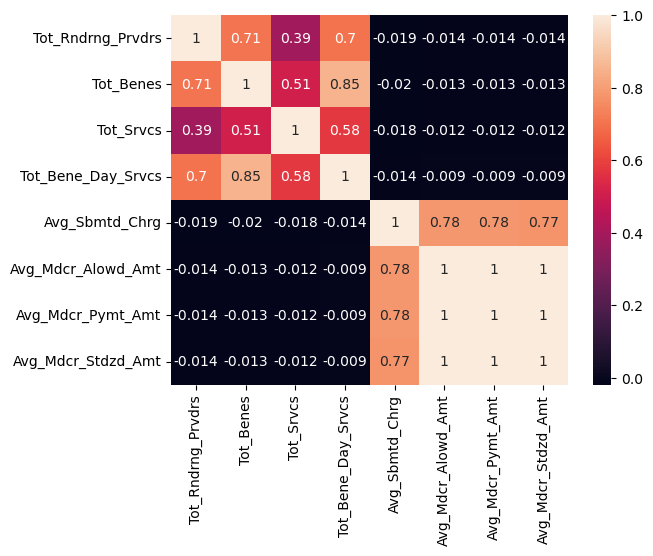

In [637]:
sns.heatmap(numericcols.corr(),annot=True)
plt.show()
# Multicollinearity among all Avg variables
# Among all variables, choose only Avg_Mdcr_Pymt_Amt which will also be dependent variable(y)
# and also Avg_Sbmtd_Chrg

In [638]:
objectcols.columns

Index(['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Cd', 'Rndrng_Prvdr_Geo_Desc',
       'HCPCS_Cd', 'HCPCS_Desc', 'HCPCS_Drug_Ind', 'Place_Of_Srvc'],
      dtype='object')

In [639]:
for col in ['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Cd', 'Rndrng_Prvdr_Geo_Desc', 
            'HCPCS_Drug_Ind', 'Place_Of_Srvc']:
    freq=objectcols[col].value_counts(dropna=False)
    print(freq)

Rndrng_Prvdr_Geo_Lvl
State       257351
National     13322
Name: count, dtype: int64
Rndrng_Prvdr_Geo_Cd
NaN    13325
06      8963
12      8442
48      8279
36      7791
       ...  
9C       220
9A       200
9B       146
69       116
60         3
Name: count, Length: 62, dtype: int64
Rndrng_Prvdr_Geo_Desc
National                              13322
California                             8963
Florida                                8442
Texas                                  8279
New York                               7791
                                      ...  
Armed Forces Central/South America      200
Armed Forces Europe                     146
Northern Mariana Islands                116
NaN                                       3
American Samoa                            3
Name: count, Length: 63, dtype: int64
HCPCS_Drug_Ind
N    257515
Y     13158
Name: count, dtype: int64
Place_Of_Srvc
F    142041
O    128632
Name: count, dtype: int64


In [640]:
objectcols=objectcols.drop('Rndrng_Prvdr_Geo_Cd',axis=1)

In [641]:
numericcols=numericcols.drop(['Avg_Mdcr_Alowd_Amt','Avg_Mdcr_Stdzd_Amt'],axis=1)

In [642]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [643]:
scaler=StandardScaler()

In [644]:
numericcols.iloc[:,[0,1,2,3,4]]=scaler.fit_transform(numericcols.iloc[:,[0,1,2,3,4]])

In [645]:
numericcols.head(2)

,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Pymt_Amt
0,-0.069752,-0.045854,-0.037678,-0.03269,-0.495910,38.484459
1,4.443096,0.462999,0.053630,0.15006,-0.495007,39.708255


In [646]:
medicaredf.HCPCS_Desc.head(2)

0    Intramuscular administration of single severe acute respiratory syndrome coronavirus 2 (covid-19) vaccine, mrna-lnp, spike protein, preservative free, 30 mcg/0.3ml dosage, diluent reconstituted; first dose
1    Intramuscular administration of single severe acute respiratory syndrome coronavirus 2 (covid-19) vaccine, mrna-lnp, spike protein, preservative free, 30 mcg/0.3ml dosage, diluent reconstituted; first dose
Name: HCPCS_Desc, dtype: object

In [647]:
medicaredf.HCPCS_Desc=medicaredf.HCPCS_Desc.str.lower() # convert to lowercase

In [648]:
# Function defined to remove digits, special characters, spaces, etc.
import re
def clean_txt(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])"," ",text).split())

In [649]:
# Implement Function above on data
medicaredf_txt=[str(clean_txt(w)) for w in medicaredf.HCPCS_Desc]

In [650]:
medicaredf_txt=pd.DataFrame(medicaredf_txt,columns=['HCPCS_DESC']) # Convert to dataframe

In [651]:
medicaredf_txt.head(2)

,HCPCS_DESC
0,intramuscular administration of single severe acute respiratory syndrome coronavirus covid vaccine mrna lnp spike protein preservative free mcg ml dosage diluent reconstituted first dose
1,intramuscular administration of single severe acute respiratory syndrome coronavirus covid vaccine mrna lnp spike protein preservative free mcg ml dosage diluent reconstituted first dose


In [652]:
from nltk.corpus import stopwords

In [653]:
english_stopwords=set(stopwords.words("english"))

In [654]:
# Split text into words using split()
medicaredf_words=medicaredf_txt.HCPCS_DESC.str.split()

In [655]:
from wordcloud import WordCloud

In [656]:
wordcloud=WordCloud(width=1000,height=500,
                    stopwords=english_stopwords,
                    collocations=False,max_words=500).generate(str(medicaredf_words))

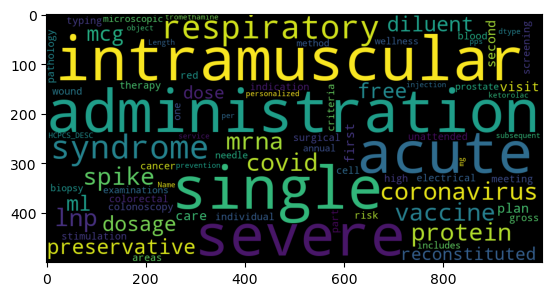

In [657]:
plt.imshow(wordcloud)
plt.show()

In [658]:
from nltk import flatten
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [659]:
medicare_words=medicaredf_words.map(" ".join) # Combined back to sentence

In [660]:
medicare_words=medicare_words.apply(word_tokenize) # Broken sentences to words

In [661]:
medicare_words_list = medicare_words.tolist() # Converted into lists

In [662]:
medicare_words_list=flatten(medicare_words_list) # Converted into Single List

In [663]:
# Remove Stopwords from list
medicare_words_list=[w for w in medicare_words_list if not w in english_stopwords]

In [664]:
wordfreq=FreqDist(medicare_words_list) # Word Frequencies

In [665]:
wordfreq.most_common(50) # Top 50 Words

[('removal', 38662),
 ('using', 35109),
 ('injection', 22113),
 ('endoscope', 18847),
 ('growth', 17397),
 ('bone', 17305),
 ('skin', 17236),
 ('blood', 15420),
 ('cm', 14947),
 ('repair', 13732),
 ('scan', 13660),
 ('minutes', 12945),
 ('insertion', 12897),
 ('treatment', 12466),
 ('tissue', 12267),
 ('x', 12204),
 ('procedure', 12157),
 ('test', 12075),
 ('ray', 12056),
 ('anesthesia', 11863),
 ('lower', 11751),
 ('contrast', 11313),
 ('heart', 10580),
 ('mg', 10304),
 ('upper', 10295),
 ('spine', 10243),
 ('joint', 9921),
 ('review', 9885),
 ('artery', 9744),
 ('leg', 9692),
 ('tube', 9428),
 ('level', 9261),
 ('ultrasound', 9094),
 ('guidance', 8915),
 ('additional', 8674),
 ('measurement', 8579),
 ('imaging', 8424),
 ('neck', 7847),
 ('analysis', 7774),
 ('radiologist', 7773),
 ('bowel', 7679),
 ('biopsy', 7659),
 ('care', 7621),
 ('per', 7494),
 ('nerve', 7457),
 ('less', 7313),
 ('views', 6961),
 ('body', 6890),
 ('arm', 6856),
 ('broken', 6592)]

In [666]:
# Convert Data into Document Term matrix
from sklearn.feature_extraction.text import CountVectorizer

In [667]:
DTM=CountVectorizer(max_features=100,stop_words="english",ngram_range=(2,2))

In [668]:
X_DTM=DTM.fit_transform(medicaredf.HCPCS_Desc) # Document Term Matrix

In [669]:
X_DTM=pd.DataFrame(X_DTM.toarray(),columns=DTM.vocabulary_) # Convert to DataFrame

In [670]:
# concatenate numericcols, objectcols and X_DTM into single dataframe
medicaredf_final=pd.concat([numericcols,objectcols,X_DTM],axis=1) 

In [671]:
medicaredf_final=medicaredf_final.dropna()

In [672]:
# Split Data into dependent variable(y) and Independent Variables (X's)
y=medicaredf_final.Avg_Mdcr_Pymt_Amt
X=medicaredf_final.drop(['Avg_Mdcr_Pymt_Amt','HCPCS_Cd', 'HCPCS_Desc'],axis=1)

In [720]:
X=pd.get_dummies(X,columns=['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Desc',
       'HCPCS_Drug_Ind', 'Place_Of_Srvc']) # Dummy Encode Object Variables

In [722]:
from sklearn.linear_model import LinearRegression

In [732]:
regmodel=LinearRegression().fit(X,y)

In [733]:
regmodel.score(X,y) # R Square

0.6346663524479774

In [736]:
reg_predict=regmodel.predict(X)

In [738]:
np.sqrt(np.mean(np.square(y-reg_predict))) # RMSE

389.5770031622181

In [740]:
from sklearn.tree import DecisionTreeRegressor

In [742]:
treemodel=DecisionTreeRegressor().fit(X,y)

In [744]:
treemodel.score(X,y)

0.9999999975087129

In [746]:
from sklearn.model_selection import cross_val_score

In [748]:
cross_val_score(treemodel,X,y)

array([0.6806766 , 0.81182904, 0.74664295, 0.75572512, 0.81960866])

In [750]:
np.mean([0.6806766 , 0.81182904, 0.74664295, 0.75572512, 0.81960866])
# Model is Overfitting as Train Model and Cross Validated 5 times average R Square is
# having big difference

0.762896474

In [752]:
treemodel_depth=DecisionTreeRegressor(max_depth=12).fit(X,y)

In [754]:
treemodel_depth.score(X,y)

0.9177637491333026

In [756]:
cross_val_score(treemodel_depth,X,y)

array([0.73182439, 0.89115283, 0.79173678, 0.7995766 , 0.86231795])

In [758]:
np.mean([0.73182439, 0.89115283, 0.79173678, 0.7995766 , 0.86231795])
# Model Not Overfitting

0.8153217099999999

In [760]:
treemodel_depth_predict=treemodel_depth.predict(X)

In [762]:
np.sqrt(np.mean(np.square(y-treemodel_depth_predict))) # RMSE

184.83326164167002

In [766]:
# Independent Variable Importance or Significanc
pd.DataFrame(X.columns,treemodel_depth.feature_importances_).sort_index(ascending=False)

,0
0.858421,Avg_Sbmtd_Chrg
0.041146,HCPCS_Drug_Ind_N
0.033122,Place_Of_Srvc_F
0.012133,Rndrng_Prvdr_Geo_Desc_Alaska
0.006846,Tot_Rndrng_Prvdrs
...,...
0.000000,sq cm
0.000000,foreign body
0.000000,Rndrng_Prvdr_Geo_Desc_Armed Forces Central/South America
0.000000,using flexible


In [768]:
from sklearn.ensemble import GradientBoostingRegressor

In [770]:
GBMmodel=GradientBoostingRegressor(n_estimators=500).fit(X,y)

In [772]:
GBMmodel.score(X,y)

0.9154740637884158

In [774]:
GBMpredict=GBMmodel.predict(X)

In [778]:
np.sqrt(np.mean(np.square(y-GBMpredict)))

187.38873128506052